<a href="https://colab.research.google.com/github/harnalashok/databases/blob/main/9_ACID_and_CAP_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 06th Oct, 2024

## ACID

ACID (atomicity, consistency, isolation, durability) is a set of properties of database transactions intended to guarantee data validity despite errors, power failures, and other mishaps.

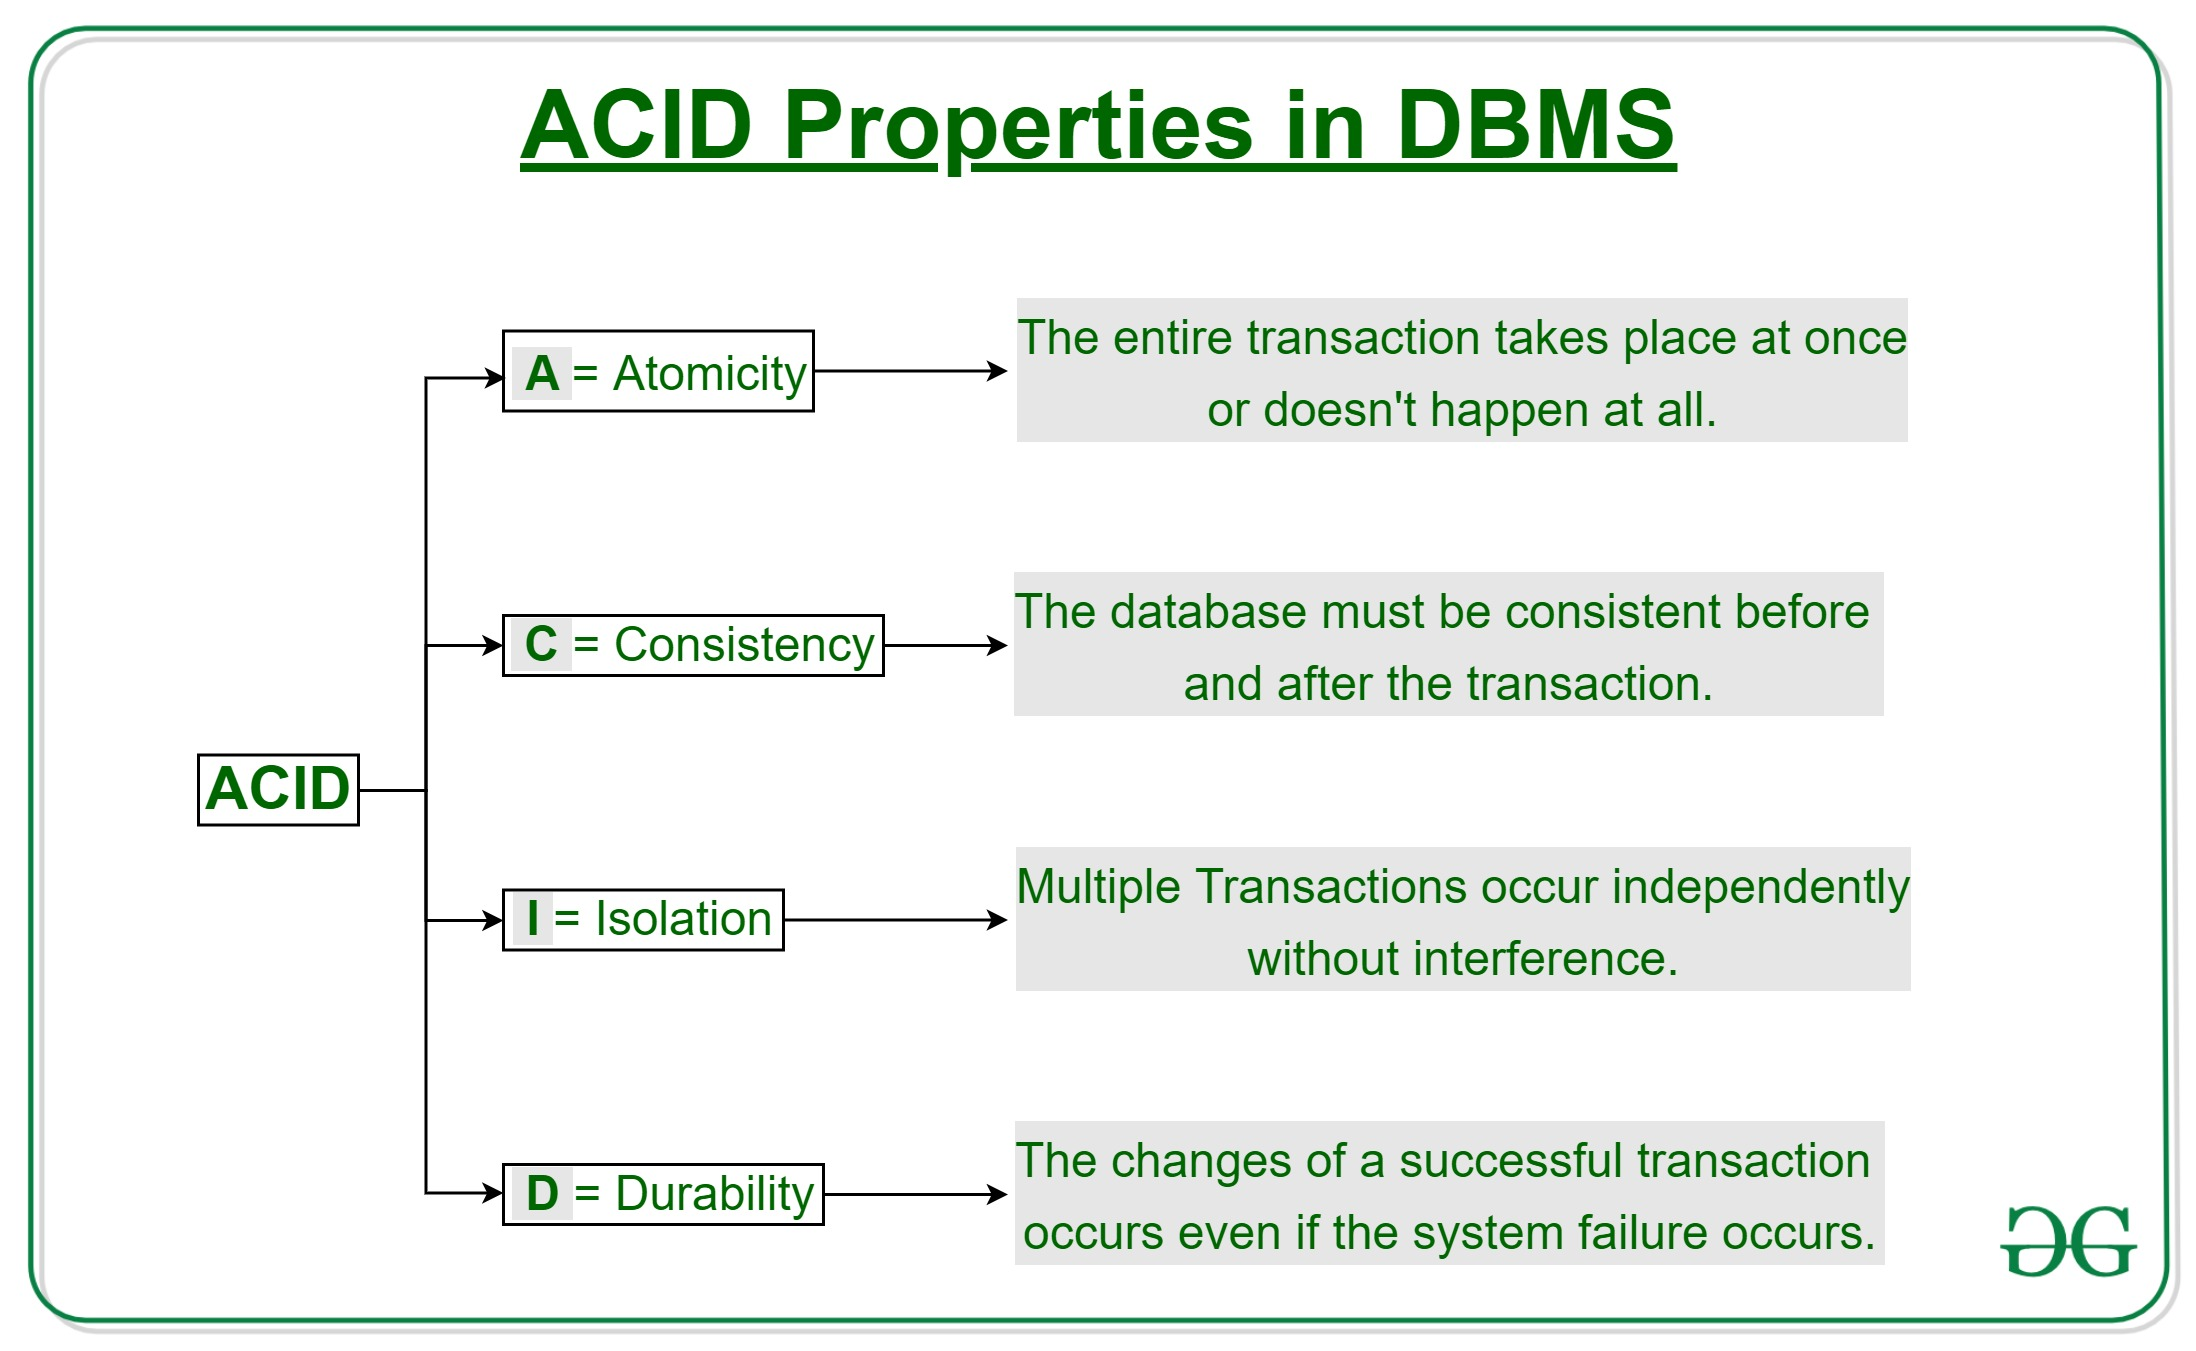

### Atomicity

Transactions are often composed of multiple statements. Atomicity guarantees that each transaction is treated as a single "unit", which either succeeds completely, or fails completely: if any of the statements constituting a transaction fails to complete, the entire transaction fails and the database is left unchanged.

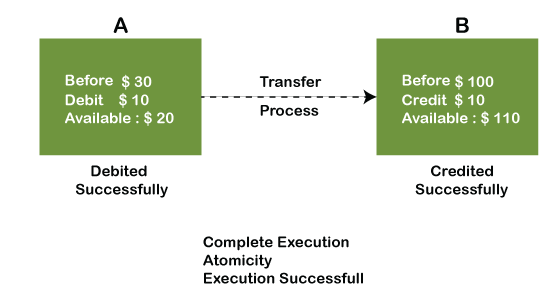

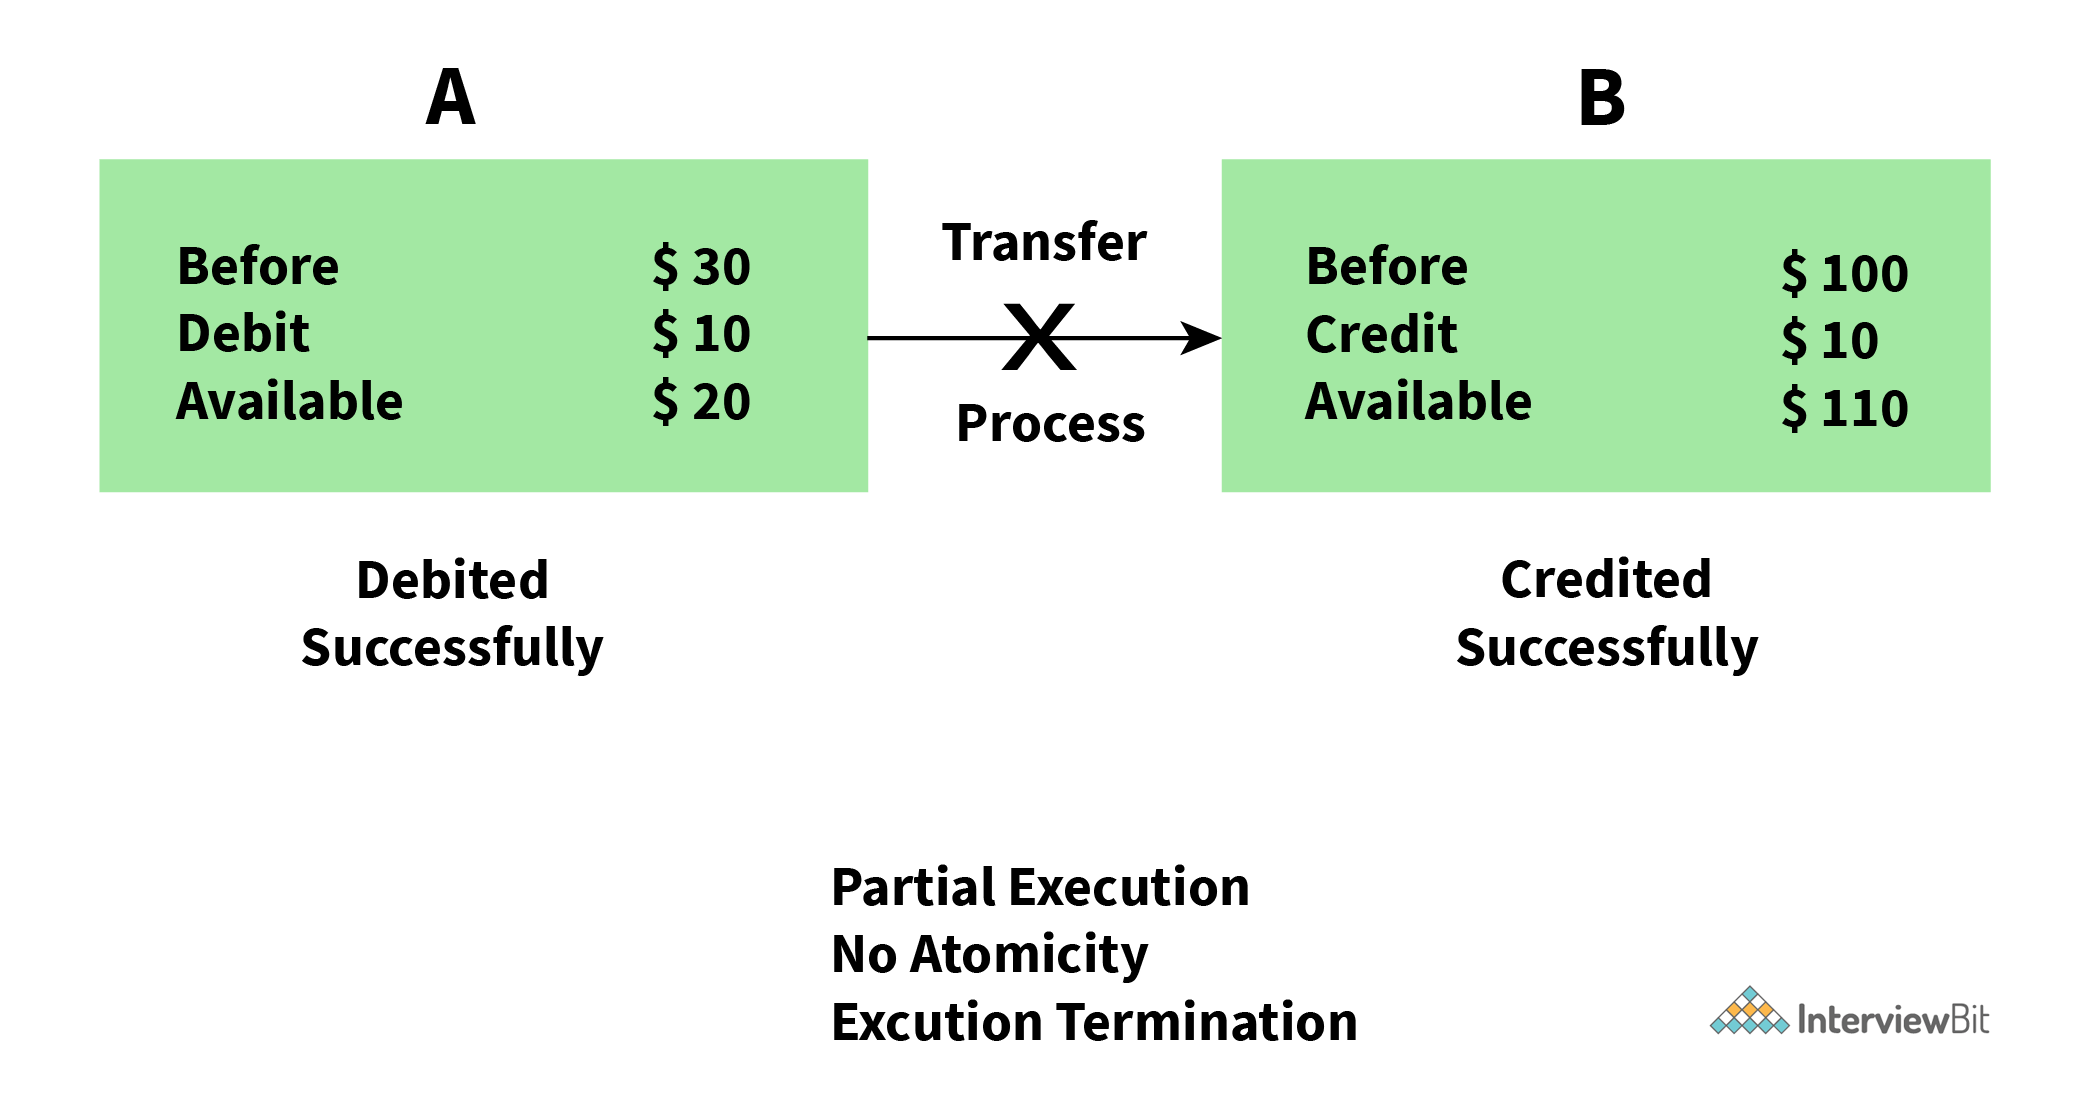

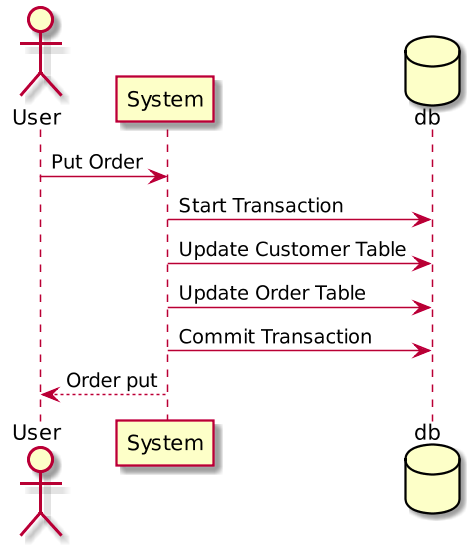

### Consistency


In general, consistency refers to the ability of a system to ensure that it complies (without fail) to a predefined set of rules.

Consistency can mean many things. Here are examples:  
1. Consistency = being able to read only committed data a given point in time, not the intermediate steps.
2. A DB that reported employee Joe Shmoe's department as Sales but that didn't list Joe Shmoe among the employees in the Sales department would be inconsistent.  
3. Consistency states that only valid data will be written to the database as a consequence of transaction. The data value stored in the database must satisfy certain consistency constraints. For example the balance on an account should not fall below $100. The DDL commands provide the facilities to specify such constraints. The database systems check these constraints every- time the database is updated.

### Isolation

In the following examples, two transactions take place. In the first, Query 1 is performed. Then, in the second transaction, Query 2 is performed and committed. Finally, in the first transaction, Query 1 is performed again.

The queries use the following data table:

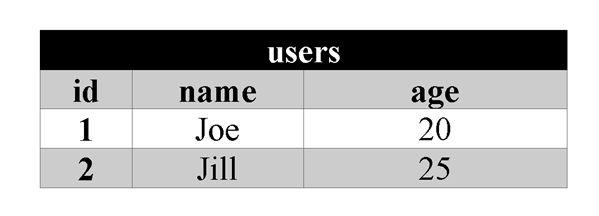

#### Dirty Read

In the following examples, two transactions take place. In the first, account is read and 10 added. Then, in the second transaction, account is read again and money subtracted. IInd transaction writes first. Ist transaction writes next overwriting the IINd.

A dirty read (aka uncommitted dependency) occurs when a transaction is allowed to read data from a row that has been modified by another running transaction and not yet committed.   
In our example, Transaction A changes a row, but does not commit/rollback the changes. Transaction B then reads the uncommitted data. Now if Transaction A rolls back its changes (already read by Transaction B) or updates different changes to the database, then the view of the data may be wrong in the records of Transaction B.

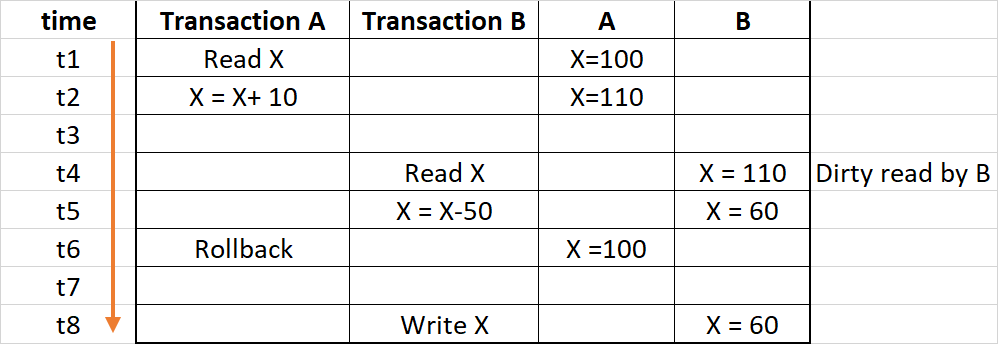

One strategy to control concurrency is to delay the execution of Transaction 2 until Transaction 1 has committed or rolled back. This enforces Serializability.

#### Lost update problem

Consider two transactions A and B performing read/write operations on a data DT in the database DB. The current value of DT is 100: The following table shows the read/write operations in A and B transactions.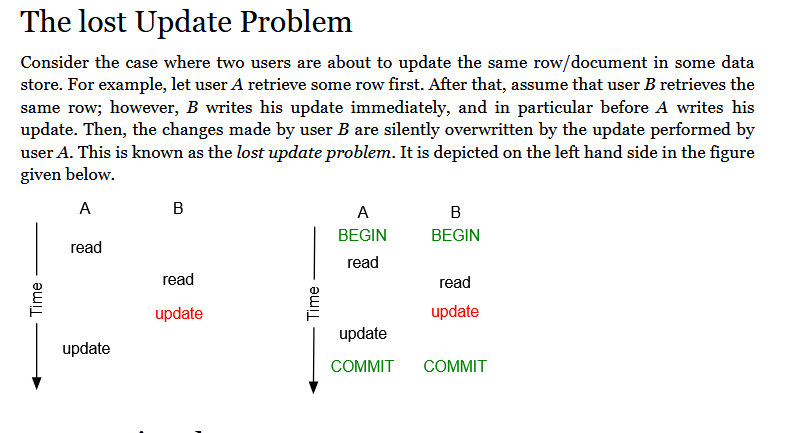

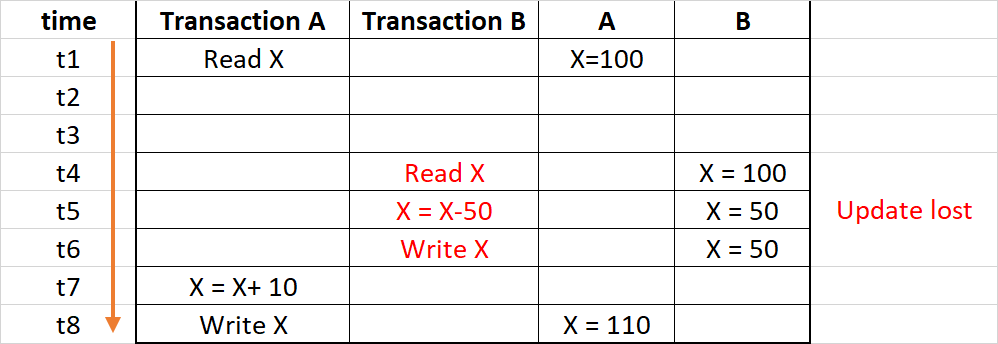

There are two basic strategies used to prevent non-repeatable reads. The first is to delay the execution of Transaction 2 until Transaction 1 has committed or rolled back. This method is used when locking is used, and produces the serial schedule T1, T2. A serial schedule exhibits repeatable reads behaviour.

In the other strategy, as used in multiversion concurrency control, Transaction 2 is permitted to commit first, which provides for better concurrency. However, Transaction 1, which commenced prior to Transaction 2, *must continue to operate on a past version of the database* — a snapshot of the moment it was started. When Transaction 1 eventually tries to commit, the DBMS checks if the result of committing Transaction 1 would be equivalent to the schedule T1, T2. If it is, then Transaction 1 can proceed. If it cannot be seen to be equivalent, however, Transaction 1 must roll back with a serialization failure.

#### Unrepeatable Read

Another problem that may occur is the unrepeatable read, where a transaction Tx reads an item twice, and the item is changed by another transaction Ty between reads. Hence, Tx receives different values for its two reads of the same item

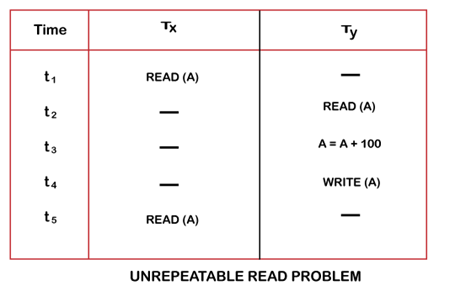

### Durability

Durability ensures that changes made to the database (transactions) that are successfully committed will survive permanently, even in the case of system failures. This ensures that the data within the database will not be corrupted by: Service outages. Crashes. Other cases of failure

## CAP theorem
But for a critical analysis of CAP theorem, read this [article](http://dbmsmusings.blogspot.com/2010/04/problems-with-cap-and-yahoos-little.html).

In theoretical computer science, the CAP theorem, also named Brewer's theorem after computer scientist Eric Brewer, states that any distributed data store can only provide two of the following three guarantees:

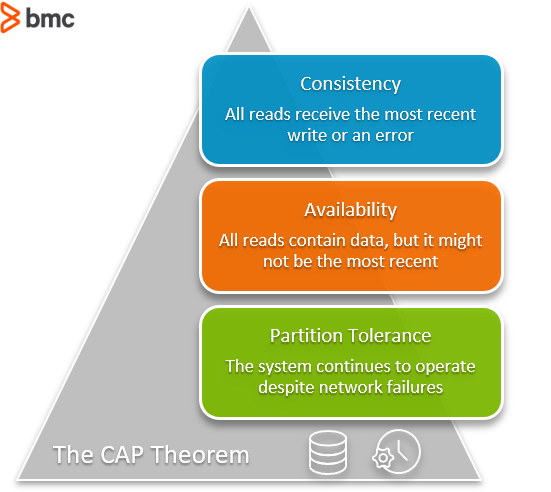

When a network partition failure happens, it must be decided whether to

* cancel the operation and thus decrease the availability but ensure consistency or to
* proceed with the operation and thus provide availability but risk inconsistency.

Thus, if there is a network partition, one has to choose between consistency and availability. Note that consistency as defined in the CAP theorem is quite different from the consistency guaranteed in ACID database transactions.[4]

No distributed system is safe from network failures, thus network partitioning generally has to be tolerated. In the presence of a partition, one is then left with two options: consistency or availability. When choosing consistency over availability, the system will return an error or a time out if particular information cannot be guaranteed to be up to date due to network partitioning. When choosing availability over consistency, the system will always process the query and try to return the most recent available version of the information, even if it cannot guarantee it is up to date due to network partitioning.

CAP is often misunderstood as a choice at all times of which one of the three guarantees to abandon. In fact, the choice is between consistency and availability only when a network partition or failure happens. When there is no network failure, both availability and consistency can be satisfied.

### BASE Theorem
See this [link](https://stackoverflow.com/a/3382260/3282777)

The BASE acronym was defined by Eric Brewer, who is also known for formulating the CAP theorem.

The CAP theorem states that a distributed computer system cannot guarantee all of the following three properties at the same time:

*    Consistency
*    Availability
*    Partition tolerance

A BASE system gives up on consistency.

*    Basically available indicates that the system does guarantee availability, in terms of the CAP theorem.
*    Soft state indicates that the state of the system may change over time, even without input. This is because of the eventual consistency model.
*    Eventual consistency indicates that the system will become consistent over time, given that the system doesn't receive input during that time.

Brewer does admit that the acronym is contrived:

>    I came up with [the BASE] acronym with my students in their office earlier that year. I agree it is contrived a bit, but so is "ACID" -- much more than people realize, so we figured it was good enough.

Basically available does NOT guarantee availability. it means, it is mostly available but the servers might go down for various reasons.


For a critical analysis of CAP theorem, read this [article](http://dbmsmusings.blogspot.com/2010/04/problems-with-cap-and-yahoos-little.html).

In [ ]:
########### Done ##############